In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace

In [6]:
alpha = 3
beta = 2e-3
delta = 6e-4
gamma = 0.5

exact_x = np.array((833.33333333, 1500.))
X_k = []
X_k_plus_1 = []

In [7]:
'''
Модель Лотки-Вольтерры
'''
def f(x):
    f_x = [alpha * x[0] - beta * x[0] * x[1],
           delta * x[0] * x[1] - gamma * x[1]]
    return np.array(f_x)
 
'''
Метод Рунге-Кутты 4-го порядка точности
'''
def rk4(x_0, t_n, f, h):
    x = np.linspace(0, 100, int(t_n / h))
    y = np.linspace(0, 100, int(t_n / h))
    i = 0
    wi = x_0
    while i < t_n / h:
        k1 = h * f(wi)
        k2 = h * f(wi + 0.5 * k1)
        k3 = h * f(wi + 0.5 * k2)
        k4 = h * f(wi + k3)
        wn = wi + (1 / 6) * (k1 + k2 + k3 + k4)
        x[i] = wn[0]
        y[i] = wn[1]
        wi = wn
        i += 1
    return x, y

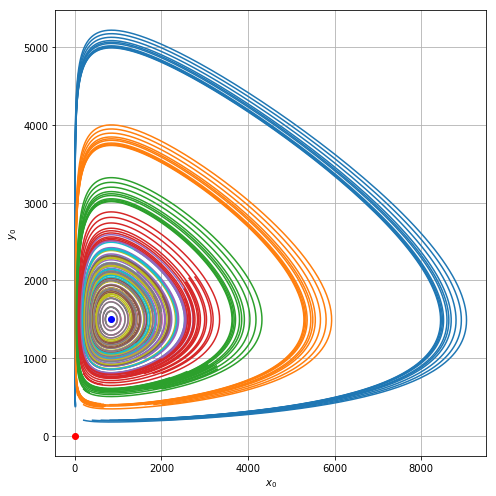

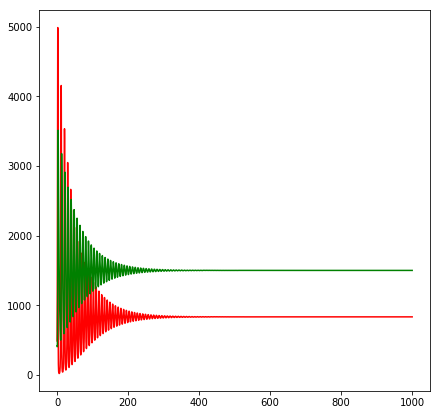

In [8]:
x_0 = np.array((200., 200.))
size = 11
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for i in range(1, size):
    for j in range(1, size):
        x_0[0] = 200 * i
        x_0[1] = 200 * j
        c = rk4(x_0, size - 1, f, 0.01)
        axes.plot(c[0], c[1], '-')
axes.plot(833.33, 1500, "o", color="blue")
axes.plot(0, 0, "o", color="red")
axes.set_xlabel('$x_0$')
axes.set_ylabel('$y_0$')
axes.grid()
fig.tight_layout() 
plt.show()
fig.savefig("rk4_phase.png", dpi = 380)
        
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))   
x_0 = np.array((420.,420.))
c = rk4(x_0,1000.,f,0.1)
t = np.linspace(0, 1000, 10000)
axes.plot(t,c[0], color='red')
axes.plot(t,c[1], color='green')